# 6.3 Geographic Visualization

This script contains the following:
1. Import data and libraries
2. Data cleaning
3. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\Martin ARAUJO\Documents\US Regional Sales Data\02- Data\Original data\us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Martin ARAUJO\Documents\US Regional Sales Data\02- Data\Original data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
path = r'C:\Users\Martin ARAUJO\Documents\US Regional Sales Data'

In [6]:
# Import the Data Frame

df = pd.read_pickle(os.path.join(path, '02- Data', 'Prepared Data', 'DF_clean.pkl'))

In [7]:
# Display of all columns in the dataset
pd.set_option('display.max_columns', None)

In [8]:
df.head(2)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population
1,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population


### 3. Data Cleaning


In [9]:
df.isnull().sum()

OrderNumber                     0
Sales Channel                   0
WarehouseCode                   0
ProcuredDate                    0
OrderDate                       0
ShipDate                        0
DeliveryDate                    0
CurrencyCode                    0
Order Quantity                  0
Discount Applied                0
Unit Price                      0
Unit Cost                       0
Customer Names                  0
City_Name_Store_location        0
County_Store_location           0
StateCode_Store_location        0
State_x_Store_location          0
Type_Store_location             0
Latitude_Store_location         0
Longitude_Store_location        0
AreaCode_Store_location         0
Population_Store_location       0
Household Income                0
Median_Income_Store_location    0
Land_Area_Store_location        0
Water_Area_Store_location       0
Time_Zone_Store_location        0
Product Name                    0
State                           0
Region        

In [10]:
##### Duplicates check
dups = df.duplicated()

In [11]:
dups.shape # no dups

(7991,)

<AxesSubplot:xlabel='Order Quantity', ylabel='Count'>

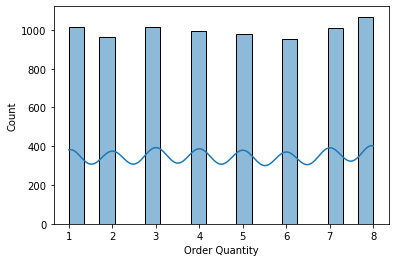

In [12]:
##### Extreme values checks
sns.histplot(df['Order Quantity'], bins=20, kde = True) # shows extreme values for 'Order Quantity'

<AxesSubplot:xlabel='Unit Price', ylabel='Count'>

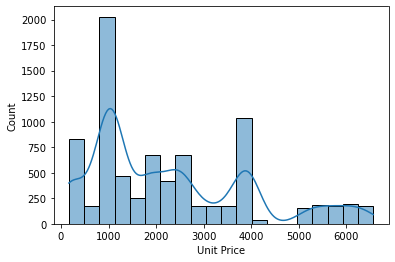

In [13]:
##### Extreme values checks
sns.histplot(df['Unit Price'], bins=20, kde = True) # shows extreme values for 'Unit Price'

In [14]:
# Check how many extreme values

df[df['Unit Price'] >1100]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population
1,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Dining Furniture,New York,Northeast,Joshua Bennett,Northeast,Low_population
2,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,2020-08-15,2020-08-16,USD,3,0.075,2492.4,1246.200,"Fenwal, Corp",Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Computers,New York,Northeast,Joshua Bennett,Northeast,Low_population
3,SO - 0006843,In-Store,WARE-PUJ1005,2020-03-10,2020-08-06,2020-08-14,2020-08-17,USD,3,0.100,3932.9,2084.437,OHTA'S Corp,Staten Island,Richmond County,NY,New York,Borough,40.57628,-74.14484,718,474558,156341,55039,152000000,110000000,America/New York,Basketball,New York,Northeast,Joshua Bennett,Northeast,High_population
4,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,2020-01-15,2020-01-21,USD,3,0.150,1755.4,1298.996,Niconovum Corp,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Cookware,New York,Northeast,Joshua Bennett,Northeast,Low_population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,SO - 0001725,Distributor,WARE-NMK1003,2018-07-19,2018-12-11,2018-12-23,2018-12-26,USD,7,0.075,6525.8,2806.094,Sundial,Washington,District of Columbia,DC,District of Columbia,City,38.90410,-77.01723,202,672228,273390,70848,158364992,18633403,America/New York,Ornaments,District of Columbia,South,Anthony Torres,West,High_population
7986,SO - 0006605,Online,WARE-MKL1006,2020-03-10,2020-07-10,2020-08-01,2020-08-07,USD,5,0.100,2706.8,1786.488,Capweld,Milwaukee,Milwaukee County/Washington County/Waukesha Co...,WI,Wisconsin,City,43.06335,-87.96670,414,600155,230807,35958,249128870,1720458,America/Chicago,Serveware,Wisconsin,Midwest,Anthony Torres,West,High_population
7987,SO - 0002504,Online,WARE-MKL1006,2018-10-27,2019-03-08,2019-03-23,2019-03-29,USD,3,0.150,1976.5,790.600,Capweld,Green Bay,Brown County,WI,Wisconsin,City,44.51916,-88.01983,920,105207,42308,42826,117673093,27054147,America/Chicago,Vanities,Wisconsin,Midwest,Anthony Torres,West,Low_population
7988,SO - 0001226,Distributor,WARE-MKL1006,2018-07-19,2018-10-12,2018-10-21,2018-10-27,USD,7,0.400,2505.8,2079.814,Ohio,Milwaukee,Milwaukee County/Washington County/Waukesha Co...,WI,Wisconsin,City,43.06335,-87.96670,414,600155,230807,35958,249128870,1720458,America/Chicago,Outdoor Decor,Wisconsin,Midwest,Anthony Torres,West,High_population


<AxesSubplot:xlabel='Household Income', ylabel='Count'>

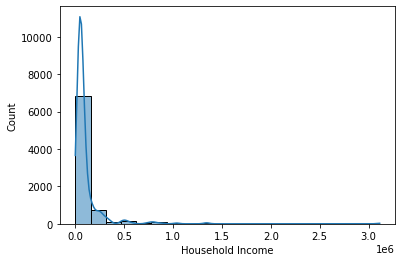

In [15]:
##### Extreme values checks
sns.histplot(df['Household Income'], bins=20, kde = True) # shows extreme values for 'Unit Price'

In [16]:
# Check how many extreme values

df[df['Household Income'] >1000000]

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,Order Quantity,Discount Applied,Unit Price,Unit Cost,Customer Names,City_Name_Store_location,County_Store_location,StateCode_Store_location,State_x_Store_location,Type_Store_location,Latitude_Store_location,Longitude_Store_location,AreaCode_Store_location,Population_Store_location,Household Income,Median_Income_Store_location,Land_Area_Store_location,Water_Area_Store_location,Time_Zone_Store_location,Product Name,State,Region,Sales Team,Sales_Team_Region,population_type
53,SO - 0007093,In-Store,WARE-XYS1001,2020-06-18,2020-09-06,2020-10-03,2020-10-13,USD,6,0.075,241.2,120.600,Select,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Floral,California,West,Joshua Bennett,Northeast,High_population
287,SO - 0006339,In-Store,WARE-NMK1003,2020-03-10,2020-06-07,2020-07-01,2020-07-04,USD,6,0.100,2881.0,2362.420,Capweld,Chicago,Cook County/DuPage County,IL,Illinois,City,41.83755,-87.68184,773,2720546,1035436,48522,588808396,17615206,America/Chicago,Cocktail Glasses,Illinois,Midwest,Keith Griffin,Northeast,High_population
312,SO - 0005121,In-Store,WARE-XYS1001,2019-12-01,2020-01-16,2020-01-21,2020-01-23,USD,2,0.075,5681.6,4090.752,Dharma Ltd,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Cookware,California,West,Keith Griffin,Northeast,High_population
530,SO - 0005855,Online,WARE-NMK1003,2019-12-01,2020-04-12,2020-04-25,2020-04-30,USD,7,0.050,3899.4,2456.622,"3LAB, Ltd",Chicago,Cook County/DuPage County,IL,Illinois,City,41.83755,-87.68184,773,2720546,1035436,48522,588808396,17615206,America/Chicago,Dining Furniture,Illinois,Midwest,Roger Alexander,Midwest,High_population
575,SO - 0004282,Online,WARE-XYS1001,2019-05-15,2019-10-09,2019-10-23,2019-10-25,USD,3,0.050,2284.7,1941.995,Apollo Ltd,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Stemware,California,West,Roger Alexander,Midwest,High_population
601,SO - 0006587,Online,WARE-XYS1001,2020-03-10,2020-07-08,2020-08-03,2020-08-12,USD,1,0.075,194.3,110.751,21st Ltd,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Collectibles,California,West,Roger Alexander,Midwest,High_population
605,SO - 000288,Online,WARE-XYS1001,2018-04-10,2018-06-22,2018-07-12,2018-07-21,USD,2,0.050,1118.9,749.663,Qualitest,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Wreaths,California,West,Roger Alexander,Midwest,High_population
867,SO - 0002952,Online,WARE-XYS1001,2019-02-04,2019-05-01,2019-05-13,2019-05-18,USD,5,0.150,1025.1,430.542,AuroMedics Corp,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Phones,California,West,Nicholas Cunningham,South,High_population
872,SO - 0006343,Online,WARE-XYS1001,2020-03-10,2020-06-08,2020-06-23,2020-07-01,USD,1,0.300,1869.3,1271.124,"Exact-Rx, Corp",Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Wreaths,California,West,Nicholas Cunningham,South,High_population
1194,SO - 0001129,Online,WARE-XYS1001,2018-07-19,2018-09-28,2018-10-23,2018-11-02,USD,8,0.400,5112.1,3271.744,Ohio,Los Angeles,Los Angeles County,CA,California,City,34.05223,-118.24368,213,3971883,1342761,50205,1214027148,88124562,America/Los Angeles,Furniture Cushions,California,West,Shawn Wallace,South,High_population


### 4. Plotting a choropleth

In [17]:
# Created a data frame with just the states and the values for Order Quantity 

data_to_plot = df[['State','Order Quantity']]
data_to_plot.head(1)

,State,Order Quantity
0,New York,5


In [18]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Order Quantity'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Order Quantity").add_to(map)
folium.LayerControl().add_to(map)

map

In [19]:
map.save('plot_data.html')

In [20]:
# Created a data frame with just the states and the values for Unit Price
data_to_plot2 = df[['State','Unit Price']]
data_to_plot2.head()

,State,Unit Price
0,New York,1963.1
1,New York,1909.5
2,New York,2492.4
3,New York,3932.9
4,New York,1755.4


In [21]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['State', 'Unit Price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Unit Price").add_to(map)
folium.LayerControl().add_to(map)

map

In [22]:
map.save('plot_data_2.html')

In [23]:
# Created a data frame with just the states and the values for Household Income 

data_to_plot3 = df[['State','Household Income']]
data_to_plot3.head()

,State,Household Income
0,New York,68789
1,New York,110549
2,New York,68789
3,New York,156341
4,New York,68789


In [24]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot3,
    columns = ['State', 'Household Income'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Household Income").add_to(map)
folium.LayerControl().add_to(map)

map

In [25]:
map.save('plot_data_3.html')

#### States with the higher income are Maine, Vermont, Delaware, Wyoming, Alaska and West Virginia, followed by Pennsylvania and Indiana.
#### States with the bigges number of orders, are Maine, Vermont, West Virginia and Wyoming.
#### States with higher pricer per unit are: Maine, Vermont, Delaware, West Virginia and Wyoming.

It will be interesting to analyze if in those States we have the biggest discounts as well:


In [26]:
# Created a data frame with just the states and the values for Discount Applied 

data_to_plot4 = df[['State','Discount Applied']]
data_to_plot4.head()

,State,Discount Applied
0,New York,0.075
1,New York,0.050
2,New York,0.075
3,New York,0.100
4,New York,0.150


In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot4,
    columns = ['State', 'Discount Applied'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Discount Applied").add_to(map)
folium.LayerControl().add_to(map)

map

Indeed, those states had the the biggest number of discount applied to the orders

In [28]:
map.save('plot_data_4.html')

Now this information will require new investigations about what is the relationship between discounts and sales, and also between high household income and increase in sales.